In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
deliv = pd.read_csv("delivery_time.csv")
deliv

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

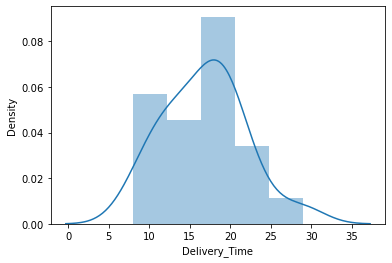

In [23]:
sns.distplot(deliv['Delivery_Time'])

C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

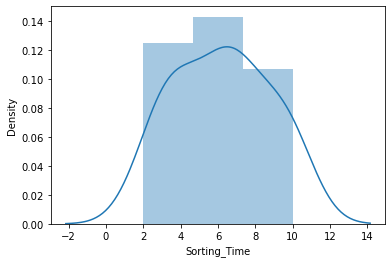

In [24]:
sns.distplot(deliv['Sorting_Time'])

In [25]:
deliv.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Text(0, 0.5, 'Sorting Time')

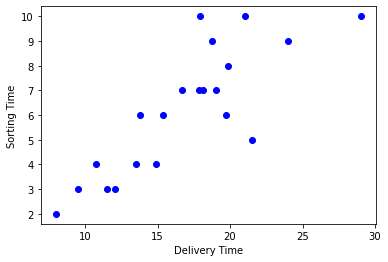

In [26]:
plt.plot(deliv.Delivery_Time,deliv.Sorting_Time,"bo")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

In [27]:
deliv.Delivery_Time.corr(deliv.Sorting_Time)

0.8259972607955326

In [28]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=deliv).fit()
model.params 

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        11:31:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [39]:
pred = model.predict(deliv.iloc[:,1])
pred
pd.set_option("display.max_rows", None) 
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [40]:

rmse_lin = np.sqrt(np.mean((np.array(deliv['Delivery_Time'])-np.array(pred))**2))
rmse_lin 

2.7916503270617654

Text(0, 0.5, 'Delivery_Time')

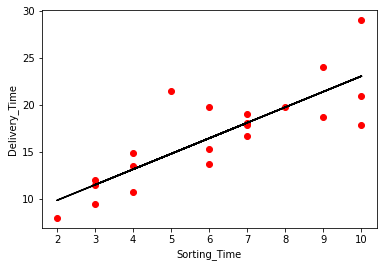

In [44]:
import matplotlib.pylab as plt
plt.scatter(x=deliv['Sorting_Time'],y=deliv['Delivery_Time'],color='red')
plt.plot(deliv['Sorting_Time'],pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [45]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=deliv).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        11:43:34   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pred2 = model2.predict(pd.DataFrame(deliv['Sorting_Time'])) 

In [48]:
pred2
rmse_log = np.sqrt(np.mean((np.array(deliv['Delivery_Time'])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [49]:
pred2.corr(deliv.Delivery_Time)

0.8339325279256244

Text(0, 0.5, 'Delivery_Time')

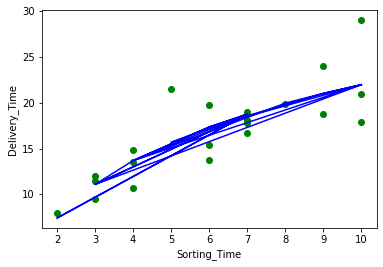

In [50]:
plt.scatter(x=deliv['Sorting_Time'],y=deliv['Delivery_Time'],color='green')
plt.plot(deliv['Sorting_Time'],pred2,color='blue')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [51]:
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time',data=deliv).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 16 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                           11:48:44   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
pred_log = model3.predict(pd.DataFrame(deliv['Sorting_Time'])) 
pred_log 

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [55]:
pred3=np.exp(pred_log) 
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [56]:
rmse_exp = np.sqrt(np.mean((np.array(deliv['Delivery_Time'])-np.array(pred3))**2))
rmse_exp 

2.940250323056201

In [58]:
pred3.corr(deliv.Delivery_Time)

0.8085780108289262

Text(0, 0.5, 'Delivery_Time')

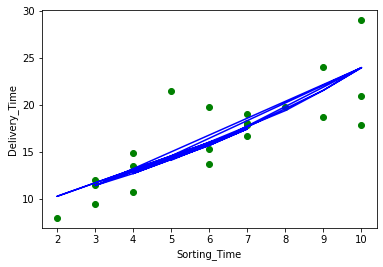

In [59]:
plt.scatter(x=deliv['Sorting_Time'],y=deliv['Delivery_Time'],color='green')
plt.plot(deliv.Sorting_Time,pred3,color='blue')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')


In [60]:
deliv_resid = model3.resid_pearson 
deliv_resid 

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

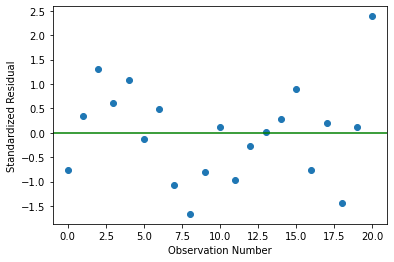

In [61]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

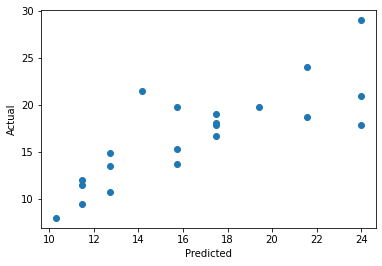

In [62]:
plt.scatter(x=pred3,y=deliv.Delivery_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [63]:
deliv["Sorting_Time_Sq"] = deliv.Sorting_Time*deliv.Sorting_Time
deliv  

,Delivery_Time,Sorting_Time,Sorting_Time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [64]:
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_Sq",data=deliv).fit()
model_quad.params 

Intercept          1.699704
Sorting_Time       0.265922
Sorting_Time_Sq   -0.012841
dtype: float64

In [65]:
model_quad.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 16 Jan 2021   Prob (F-statistic):           2.20e-06
Time:                           12:01:04   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
pred_quad = model_quad.predict(deliv)
pred4=np.exp(pred_quad) 
rmse_quad = np.sqrt(np.mean((np.array(deliv['Delivery_Time'])-np.array(pred4))**2))
rmse_quad  

2.7990419887409246

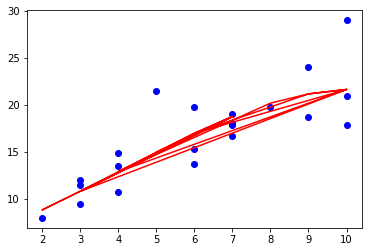

In [68]:
plt.scatter(deliv.Sorting_Time,deliv.Delivery_Time,c="b")
plt.plot(deliv.Sorting_Time,pred4,"r")

In [70]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867
